# Unsupervised Learning

Objective : The notebook will explore unsupervised algorithms to explore and find structure in the gene expression data.  Additionally, the notebook aims to used task based objectives to both evaluate and improve clustering results.

## Library Imports

In [2]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from scipy.cluster.hierarchy import ward, complete, average, dendrogram, fcluster, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF

RANDOM_SEED = 42

## Import Data
Importing data with 10 principal components, this number of principal components was found to be the highest performing data set on supervised learning tasks.   

In [3]:
# Import PCA data
train_file = "data/X_train_10_PCs.csv"
test_file = "data/X_test_10_PCs.csv"
ytrain_file = 'data/y_train.csv'
ytest_file = 'data/y_test.csv'

PCA_X_train = pd.read_csv(train_file)
PCA_X_train.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train.set_index('CellID', inplace = True)

PCA_X_test = pd.read_csv(test_file)
PCA_X_test.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_test.set_index('CellID', inplace = True)

y_train = pd.read_csv(ytrain_file)
y_train.set_index('CellID', inplace = True)

y_test = pd.read_csv(ytest_file)
y_test.set_index('CellID', inplace = True)

# Clustering
## Agglomerative Clustering

In [4]:
# Create agglomerative model 
# Using the ward function to create the model
agglo_model = ward(PCA_X_train)
agglo_model_complete = complete(PCA_X_train)
agglo_model_average= average(PCA_X_train)

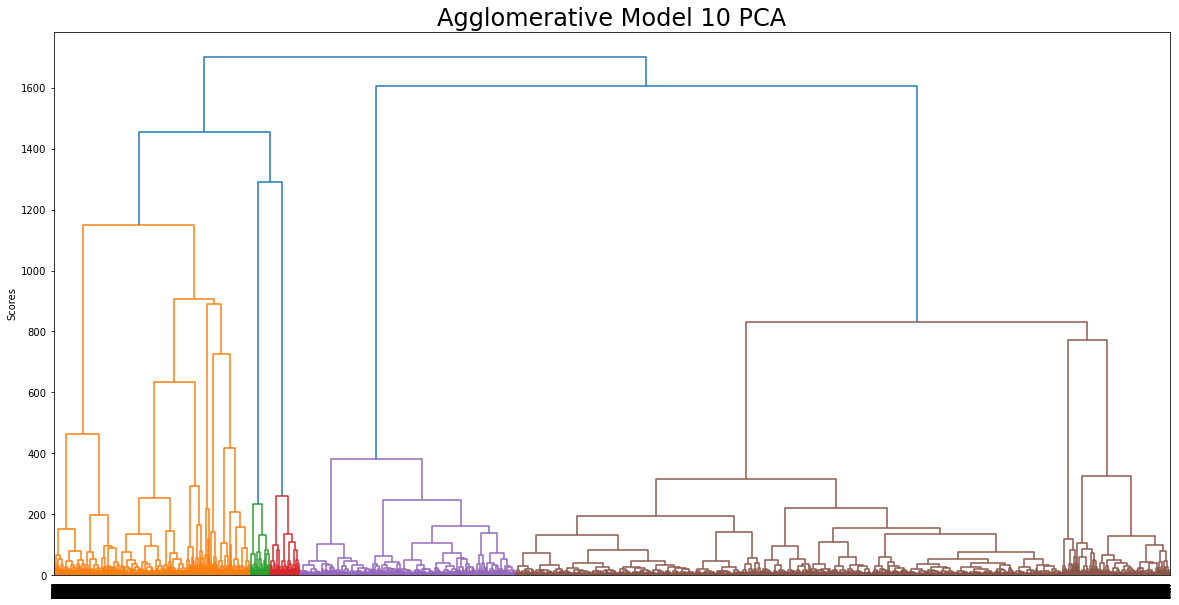

In [60]:
#plot unbalanced dendrogram
plt.figure(figsize = (20,10))
dendrogram(agglo_model)
plt.title('Agglomerative Model 10 PCA', fontsize = 24)
plt.ylabel('Scores')
plt.show()

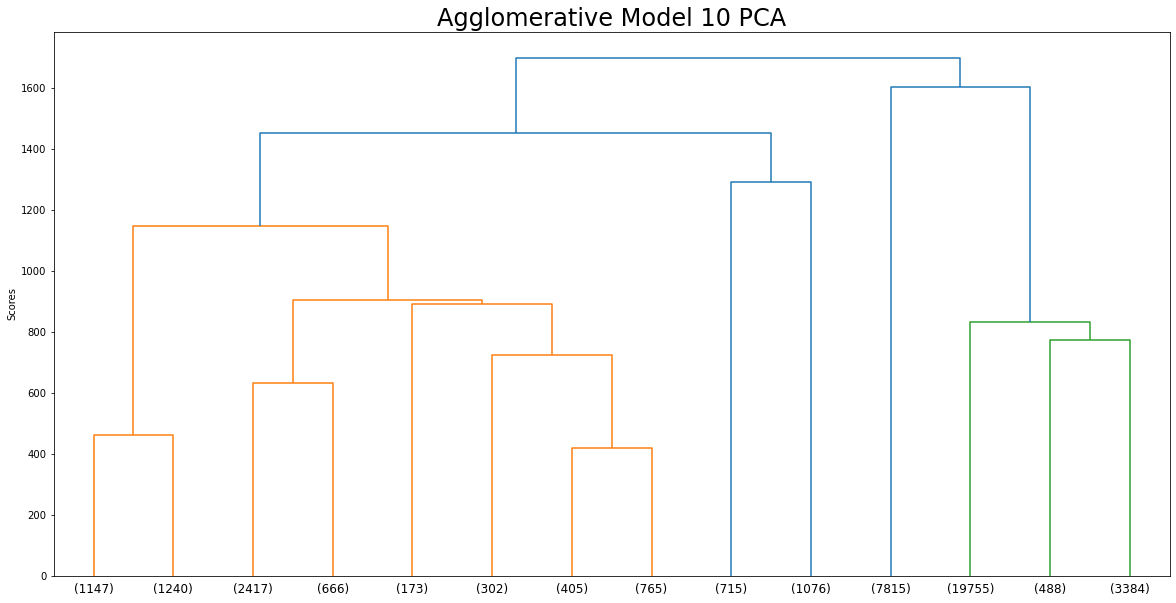

In [59]:
#plot unbalanced dendrogram
# Sources: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize = (20,10))
dendrogram(agglo_model, p = 14, truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Agglomerative Model 10 PCA', fontsize = 24)
plt.ylabel('Scores')
plt.show()

In [7]:
# Create Labels and Score Cluster Models   
# create labels from the aggolmerative clustering to test 
k=14  # number of clusters
# ward
agglo_labels  = fcluster(agglo_model, k, criterion='maxclust')

agglo_adjrand = metrics.adjusted_rand_score(y_train.type.values, agglo_labels)
agglo_homogeneity = metrics.homogeneity_score(y_train.type.values, agglo_labels)
agglo_vmeasure = metrics.v_measure_score(y_train.type.values, agglo_labels)
agglo_complete = metrics.completeness_score(y_train.type.values, agglo_labels) 

# complete
agglo_labels_complete  = fcluster(agglo_model_complete, k, criterion='maxclust')

agglo_adjrand_complete = metrics.adjusted_rand_score(y_train.type.values, agglo_labels_complete)
agglo_homogeneity_complete = metrics.homogeneity_score(y_train.type.values, agglo_labels_complete)
agglo_vmeasure_complete = metrics.v_measure_score(y_train.type.values, agglo_labels_complete)
agglo_complete_complete = metrics.completeness_score(y_train.type.values, agglo_labels_complete) 

# average
agglo_labels_average  = fcluster(agglo_model_average, k, criterion='maxclust')

agglo_adjrand_average = metrics.adjusted_rand_score(y_train.type.values, agglo_labels_average)
agglo_homogeneity_average = metrics.homogeneity_score(y_train.type.values, agglo_labels_average)
agglo_vmeasure_average = metrics.v_measure_score(y_train.type.values, agglo_labels_average)
agglo_complete_average = metrics.completeness_score(y_train.type.values, agglo_labels_average) 

# tally results in agglo_score dataframe
agglo_score = pd.DataFrame({'Agglo Ward' : [agglo_adjrand, agglo_homogeneity, agglo_vmeasure, agglo_complete]},
    index=['Adj_Rand', 'Homogeneity', 'Vmeasure', 'Completeness'])
agglo_score['Agglo complete'] = [agglo_adjrand_complete, agglo_homogeneity_complete, agglo_vmeasure_complete, agglo_complete_complete]
agglo_score['Agglo average'] = [agglo_adjrand_average, agglo_homogeneity_average, agglo_vmeasure_average, agglo_complete_average]

# add best score and method to score dataframe
score = pd.DataFrame({'Agglomerative PC10' : [agglo_adjrand, agglo_homogeneity, agglo_vmeasure, agglo_complete]},
    index=['Adj_Rand', 'Homogeneity', 'Vmeasure', 'Completeness'])

In [8]:
# How did the  agglomerative model do?
agglo_score.round(3)

,Agglo Ward,Agglo complete,Agglo average
Adj_Rand,0.552,0.166,0.105
Homogeneity,0.687,0.353,0.256
Vmeasure,0.739,0.474,0.383
Completeness,0.800,0.720,0.759


In [9]:
# repeat process for 100 component PCA
 # Import PCA data
train100_file = "data/X_train_100_PCs.csv"
test100_file = "data/X_test_100_PCs.csv"

PCA_X_train100 = pd.read_csv(train100_file)
PCA_X_train100.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train100.set_index('CellID', inplace = True)

PCA_X_test100 = pd.read_csv(test100_file)
PCA_X_test100.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_test100.set_index('CellID', inplace = True)

agglo_model100 = ward(PCA_X_train100)
agglo_labels100  = fcluster(agglo_model100, k, criterion='maxclust')
agglo_adjrand100 = metrics.adjusted_rand_score(y_train.type.values, agglo_labels100)
agglo_homogeneity100 = metrics.homogeneity_score(y_train.type.values, agglo_labels100)
agglo_vmeasure100 = metrics.v_measure_score(y_train.type.values, agglo_labels100)
agglo_complete100 = metrics.completeness_score(y_train.type.values, agglo_labels100)
score['Agglomerative PC100'] = [agglo_adjrand100, agglo_homogeneity100, agglo_vmeasure100, agglo_complete100  ]



## K-Means Clustering

In [10]:
kmeans = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train)
kmeans100 = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train100)

In [11]:
# Score K-means
kmean_adjrand = metrics.adjusted_rand_score(y_train.type.values, kmeans.labels_)
kmean_homogeneity = metrics.homogeneity_score(y_train.type.values, kmeans.labels_)
kmean_vmeasure = metrics.v_measure_score(y_train.type.values, kmeans.labels_)
kmean_complete = metrics.completeness_score(y_train.type.values, kmeans.labels_)
score['K-means PC10'] = [kmean_adjrand, kmean_homogeneity, kmean_vmeasure, kmean_complete]

kmean_adjrand100 = metrics.adjusted_rand_score(y_train.type.values, kmeans100.labels_)
kmean_homogeneity100 = metrics.homogeneity_score(y_train.type.values, kmeans100.labels_)
kmean_vmeasure100 = metrics.v_measure_score(y_train.type.values, kmeans100.labels_)
kmean_complete100 = metrics.completeness_score(y_train.type.values, kmeans100.labels_)
score['K-means PC100'] = [kmean_adjrand100, kmean_homogeneity100, kmean_vmeasure100, kmean_complete100]

In [12]:
# View results
score.round(3)

,Agglomerative PC10,Agglomerative PC100,K-means PC10,K-means PC100
Adj_Rand,0.552,0.537,0.645,0.615
Homogeneity,0.687,0.680,0.724,0.755
Vmeasure,0.739,0.731,0.726,0.736
Completeness,0.800,0.791,0.728,0.717


## DBSCAN
DBSCAN with defaults results in very poor model.  
Trying method from lecture notes to find best parameters.

        - sample ~10% of dataframe
        - compute K nearest neighbors distance for small K (eg 1)
        - set eps to multiple of median of distance, ie 3x
        - start with min samples = 5

In [13]:
# computing K nearnest neighbors
from sklearn.neighbors import KNeighborsClassifier
kdistmodel = KNeighborsClassifier(n_neighbors=1)
kdistmodel.fit(PCA_X_train.sample(4000, random_state = RANDOM_SEED), y_train.sample(4000, random_state = RANDOM_SEED).values.ravel())
dist = kdistmodel.kneighbors()
starting_median =  np.median(dist[0])
print("median we need to start with:" , starting_median)

median we need to start with: 1.4500426830343105


In [14]:
# create function to Compute DBSCAN metrics with different parameters

def db_scan_metrics(n_eps, n_min_samples):
    db = DBSCAN(eps=n_eps, min_samples=n_min_samples).fit(PCA_X_train)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    # return results
    return [n_clusters_, n_noise_,metrics.homogeneity_score(y_train.type.values, labels),
      metrics.completeness_score(y_train.type.values, labels),
      metrics.v_measure_score(y_train.type.values, labels),
      metrics.adjusted_rand_score(y_train.type.values, labels),
      metrics.adjusted_mutual_info_score(y_train.type.values, labels)]


In [15]:
dbscan_results = pd.DataFrame(index = ['clusters', 'n_noise', 'homogeneity', 'completeness', 'vmeasure',
    'adj_rand_score', 'adj_mutual_info'], columns = [[5,5,5,6,6,6,7,7,7], [3,6,9,3,6,9,3,6,9]])
dbscan_results.columns.names = ['min_samples', 'eps']
for param in dbscan_results.columns:
    vect = db_scan_metrics(param[1],param[0])
    dbscan_results[(param[0], param[1])] = vect
    

In [16]:
dbscan_results.round(3)

min_samples             5                          6                   \
eps                     3        6       9         3        6       9   
clusters           31.000    2.000   1.000    22.000    3.000   1.000   
n_noise          2826.000  118.000  24.000  3035.000  127.000  25.000   
homogeneity         0.165    0.015   0.001     0.162    0.015   0.001   
completeness        0.650    0.668   0.243     0.649    0.648   0.246   
vmeasure            0.263    0.029   0.001     0.259    0.029   0.001   
adj_rand_score      0.078    0.005   0.000     0.079    0.005   0.000   
adj_mutual_info     0.261    0.029   0.001     0.257    0.029   0.001   

min_samples             7                   
eps                     3        6       9  
clusters           17.000    3.000   2.000  
n_noise          3247.000  138.000  26.000  
homogeneity         0.159    0.015   0.013  
completeness        0.648    0.640   0.848  
vmeasure            0.255    0.029   0.026  
adj_rand_score      0.079    0.005   0.004  
adj_mutual_info     0.254    0.029   0.026

In [17]:
# add best result to score table of all cluster algos
score['DBSCAN'] = [dbscan_results[(7,3)].adj_rand_score, dbscan_results[(7,3)].homogeneity, 
    dbscan_results[(7,3)].vmeasure, dbscan_results[(7,3)].completeness]

score.round(3)

,Agglomerative PC10,Agglomerative PC100,K-means PC10,K-means PC100,DBSCAN
Adj_Rand,0.552,0.537,0.645,0.615,0.079
Homogeneity,0.687,0.680,0.724,0.755,0.159
Vmeasure,0.739,0.731,0.726,0.736,0.255
Completeness,0.800,0.791,0.728,0.717,0.648


# Visualize Clusters
## Use TSNE and UMAP 

In [18]:
tsne = TSNE(random_state = RANDOM_SEED)
data_tsne = tsne.fit_transform(PCA_X_train)
tsne_df = pd.DataFrame(data_tsne, columns = ['feature0', 'feature1'])
tsne_df['agglolabel'] = agglo_labels
tsne_df['k_label'] = kmeans.labels_
tsne_df['truthlabel'] = y_train.type.values

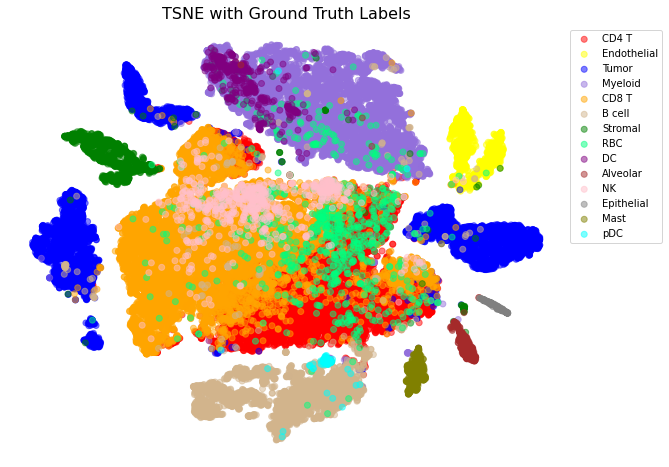

In [19]:
#Chart Cluster with ground truth using TSNE
colors = {'CD4 T':'red', 'Endothelial':'yellow', 'Tumor':'blue', 'Myeloid':'mediumpurple', 'CD8 T': 'orange', 
    'B cell': 'tan','Stromal':'green', 'RBC': 'springgreen', 'DC':'purple', 'Alveolar':'brown', 'NK':'pink',
     'Epithelial':'gray', 'Mast':'olive', 'pDC':'cyan'}

tsne_df['colors'] = tsne_df.truthlabel.map(colors)

fig, ax = plt.subplots(figsize = (10,8))
plt.title('TSNE with Ground Truth Labels',fontsize=16, loc = 'center')
for item in tsne_df['truthlabel'].unique():
    ax.scatter(tsne_df[tsne_df['truthlabel'] == item].feature0,
    tsne_df[tsne_df['truthlabel'] == item].feature1,
    c= tsne_df[tsne_df['truthlabel'] == item].colors,
    label = item,
    alpha = 0.5)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

ax.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()




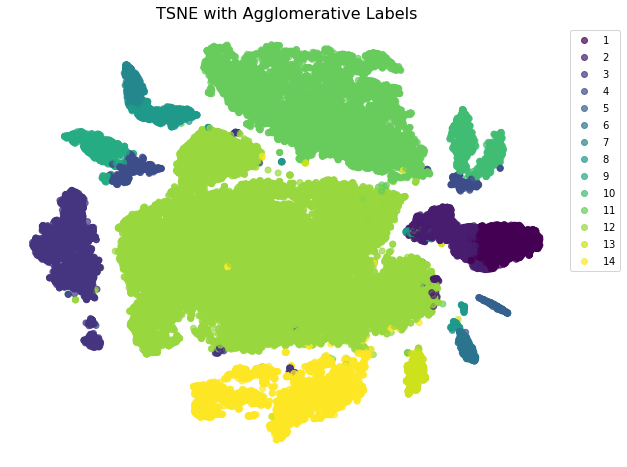

In [20]:
#Chart Cluster with agglomerative using TSNE

fig, ax = plt.subplots(figsize = (10,8))
scatter = ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.agglolabel, alpha = 0.7)
plt.title('TSNE with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

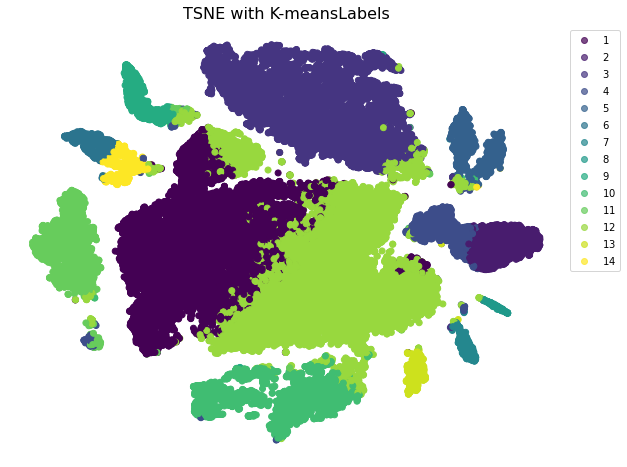

In [21]:
#Chart Cluster with K-means labels using TSNE

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.k_label)
plt.title('TSNE with K-meansLabels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

## UMAP Visualization

In [22]:
reducer = umap.UMAP(n_neighbors= 25)
embedding = reducer.fit_transform(PCA_X_train)
umap_df = pd.DataFrame(embedding, columns = ['feature0', 'feature1'])
umap_df['truthlabel'] = y_train.type.values
umap_df['agglolabel'] = agglo_labels
umap_df['k_label'] = kmeans.labels_

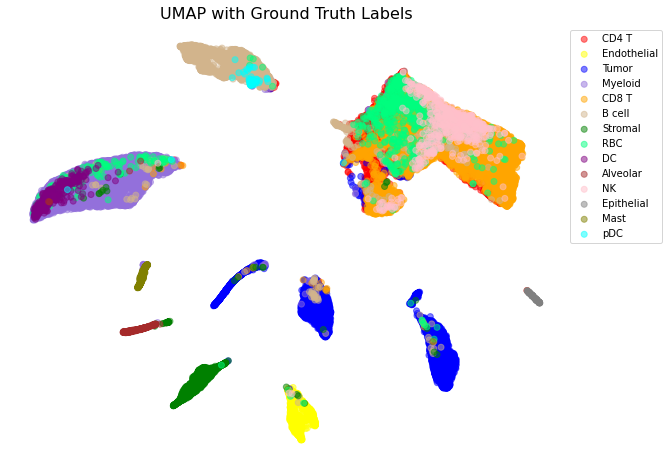

In [23]:
#Chart Cluster with ground truth using UMAP
colors = {'CD4 T':'red', 'Endothelial':'yellow', 'Tumor':'blue', 'Myeloid':'mediumpurple', 'CD8 T': 'orange', 
    'B cell': 'tan','Stromal':'green', 'RBC': 'springgreen', 'DC':'purple', 'Alveolar':'brown', 'NK':'pink',
     'Epithelial':'gray', 'Mast':'olive', 'pDC':'cyan'}

umap_df['colors'] = umap_df.truthlabel.map(colors)

fig, ax = plt.subplots(figsize = (10,8))
plt.title('UMAP with Ground Truth Labels',fontsize=16, loc = 'center')
for item in umap_df['truthlabel'].unique():
    ax.scatter(umap_df[umap_df['truthlabel'] == item].feature0,
    umap_df[umap_df['truthlabel'] == item].feature1,
    c= umap_df[umap_df['truthlabel'] == item].colors,
    label = item,
    alpha = 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

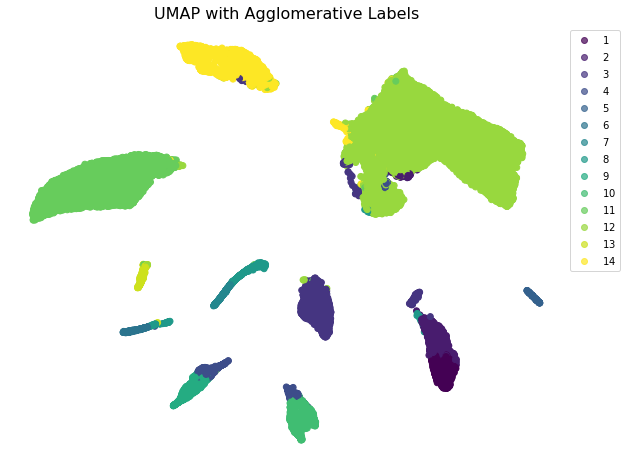

In [24]:
#Chart Cluster with agglomerative using UMAP

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.agglolabel)
plt.title('UMAP with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

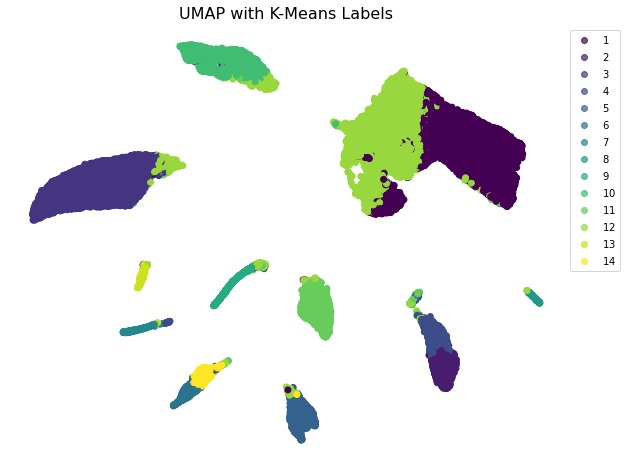

In [25]:
#Chart Cluster with K-means using UMAP

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.k_label)
plt.title('UMAP with K-Means Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

# Explore Non-Negative Matrix Factorization (NMF)
Find latent structure in gene expression data.  Generalize the idea in which NMF which takes a document-matrix and returns a document-topic matrix and a topic-term matrix.  The generalization is to take a cell-gene expression matrix and return a cell-topic matrix and a topic-gene expression matrix.  Here the idea is that the concept "topic" generalizes to clusters of gene expression which may point to cell types.  To state differently the latent structure found - the topics - represent common gene expression patterns that can identify similar cells.  Therefore the document-topic matrix, W,  is a cell-cell type matrix.  Similarily the topic-term matrix represents a cell type - gene expression matrix.  This cell type - gene expression matrix is interesting (possibly) because it may tell us what genes are most expressed in a type of cell.   

In [26]:
# Load raw cell data
X_train_csv = "data/X_train.csv"
X_test_csv = "data/X_test.csv"
X_train_df = pd.read_csv(X_train_csv)
X_train_df.set_index('CellID', inplace = True)


In [27]:
# Fit the model
nmf_model = NMF(n_components=14, init='nndsvd', max_iter = 1000, random_state=42)
W = nmf_model.fit_transform(X_train_df)
H = nmf_model.components_

In [28]:
# Create Labels and score model
nmf_labels = np.argmax(W, axis=1)
nmf_adjrand = metrics.adjusted_rand_score(y_train.type.values, nmf_labels)
nmf_homogeneity = metrics.homogeneity_score(y_train.type.values, nmf_labels)
nmf_vmeasure = metrics.v_measure_score(y_train.type.values, nmf_labels)
nmf_complete = metrics.completeness_score(y_train.type.values, nmf_labels)
score['NMF'] = [nmf_adjrand, nmf_homogeneity, nmf_vmeasure, nmf_complete]

In [29]:
# Normalize the data with log method
norm_X_train = np.log(1+X_train_df) 

In [30]:
# Fit the normalized model
norm_nmf_model = NMF(n_components=14, init='nndsvd', max_iter = 2000, random_state=42)
Wnorm = norm_nmf_model.fit_transform(norm_X_train)
Hnorm = norm_nmf_model.components_

In [31]:
#Score the normalized model
nmf_labels_norm = np.argmax(Wnorm, axis=1)
nmf_adjrand_n = metrics.adjusted_rand_score(y_train.type.values, nmf_labels_norm)
nmf_homogeneity_n = metrics.homogeneity_score(y_train.type.values, nmf_labels_norm)
nmf_vmeasure_n = metrics.v_measure_score(y_train.type.values, nmf_labels_norm)
nmf_complete_n = metrics.completeness_score(y_train.type.values, nmf_labels_norm)
score['NMF Norm'] = [nmf_adjrand_n, nmf_homogeneity_n, nmf_vmeasure_n, nmf_complete_n]

In [32]:
# Show the results matrix with NMF added in
score.round(3)

,Agglomerative PC10,Agglomerative PC100,K-means PC10,K-means PC100,DBSCAN,NMF,NMF Norm
Adj_Rand,0.552,0.537,0.645,0.615,0.079,0.348,0.372
Homogeneity,0.687,0.680,0.724,0.755,0.159,0.568,0.605
Vmeasure,0.739,0.731,0.726,0.736,0.255,0.522,0.539
Completeness,0.800,0.791,0.728,0.717,0.648,0.483,0.486


In [89]:
# generate top expressed genes per cell type / cluster (topic) using log normed data
# code amended from class notebook
n_types = 14
n_genes = 10

cell_gene_cluster_df = pd.DataFrame()

for topic_index in range(0, n_types):
    top_indices = np.argsort(Hnorm[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:n_genes]:
        top_terms.append(X_train_df.columns[term_index])
    nam = "cell cluster " + str(topic_index)
    cell_gene_cluster_df[nam] = top_terms   
    print("cell type cluster ", topic_index, top_terms)
    

cell type cluster  0 ['MALAT1', 'MT-CO3', 'MT-CO1', 'MT-CO2', 'MT-CYB', 'MT-ND4', 'MT-ND2', 'MT-ATP6', 'B2M', 'MT-ND1']
cell type cluster  1 ['C1QB', 'APOC1', 'C1QA', 'HLA-DRA', 'APOE', 'CD74', 'FTL', 'CTSD', 'HLA-DPB1', 'C1QC']
cell type cluster  2 ['RPS6', 'RPS18', 'GAPDH', 'RPS12', 'PTMA', 'RPL37', 'TMSB10', 'RPS19', 'RPL35A', 'RPL13A']
cell type cluster  3 ['EEF1A1', 'PFN1', 'ACTB', 'MT-CO1', 'RPL3', 'GAPDH', 'RPS2', 'ACTG1', 'CFL1', 'HNRNPA1']
cell type cluster  4 ['SPP1', 'S100A11', 'CSTB', 'S100A10', 'GSTP1', 'TXN', 'TMSB10', 'FGB', 'FTH1', 'FTL']
cell type cluster  5 ['MT-CO3', 'MT-ATP6', 'MT-ND2', 'MT-CYB', 'MT-CO2', 'MT-ND4', 'MT-CO1', 'MT-ND3', 'MT-ND1', 'MALAT1']
cell type cluster  6 ['IFITM3', 'MT2A', 'IGFBP7', 'ITM2B', 'B2M', 'ZFP36', 'SPARC', 'TIMP1', 'HLA-B', 'IFI27']
cell type cluster  7 ['IGKC', 'SSR4', 'JCHAIN', 'IGHG1', 'IGHG3', 'MZB1', 'IGHA1', 'IGLC2', 'XBP1', 'HERPUD1']
cell type cluster  8 ['HSP90AA1', 'ISG15', 'HSPA1A', 'MALAT1', 'GAPDH', 'B2M', 'LY6E', 'HLA-A'

In [91]:
cell_gene_cluster_df.name = 'Cell Cluster - Top Gene Expression Matrix'
cell_gene_cluster_df

,cell cluster 0,cell cluster 1,cell cluster 2,cell cluster 3,cell cluster 4,cell cluster 5,cell cluster 6,cell cluster 7,cell cluster 8,cell cluster 9,cell cluster 10,cell cluster 11,cell cluster 12,cell cluster 13
0,MALAT1,C1QB,RPS6,EEF1A1,SPP1,MT-CO3,IFITM3,IGKC,HSP90AA1,RPL37,CD74,CCL5,TYROBP,BTG1
1,MT-CO3,APOC1,RPS18,PFN1,S100A11,MT-ATP6,MT2A,SSR4,ISG15,RPL41,HLA-DRA,NKG7,LYZ,CXCR4
2,MT-CO1,C1QA,GAPDH,ACTB,CSTB,MT-ND2,IGFBP7,JCHAIN,HSPA1A,RPL37A,RPL13A,CCL4,SRGN,RPS27
3,MT-CO2,HLA-DRA,RPS12,MT-CO1,S100A10,MT-CYB,ITM2B,IGHG1,MALAT1,RPS27,RPL21,GZMA,SAT1,JUNB
4,MT-CYB,APOE,PTMA,RPL3,GSTP1,MT-CO2,B2M,IGHG3,GAPDH,RPS28,HLA-DPB1,GZMB,CST3,RPL34
5,MT-ND4,CD74,RPL37,GAPDH,TXN,MT-ND4,ZFP36,MZB1,B2M,RPL38,RPS23,GNLY,FCER1G,RPL21
6,MT-ND2,FTL,TMSB10,RPS2,TMSB10,MT-CO1,SPARC,IGHA1,LY6E,S100A6,RPS27,CTSW,FOS,TSC22D3
7,MT-ATP6,CTSD,RPS19,ACTG1,FGB,MT-ND3,TIMP1,IGLC2,HLA-A,RPS29,RPL34,GZMH,S100A4,B2M
8,B2M,HLA-DPB1,RPL35A,CFL1,FTH1,MT-ND1,HLA-B,XBP1,HLA-B,MT-ND3,RPS6,PRF1,AIF1,SARAF
9,MT-ND1,C1QC,RPL13A,HNRNPA1,FTL,MALAT1,IFI27,HERPUD1,CXCL13,RPL36,RPS14,CST7,NEAT1,RPS29


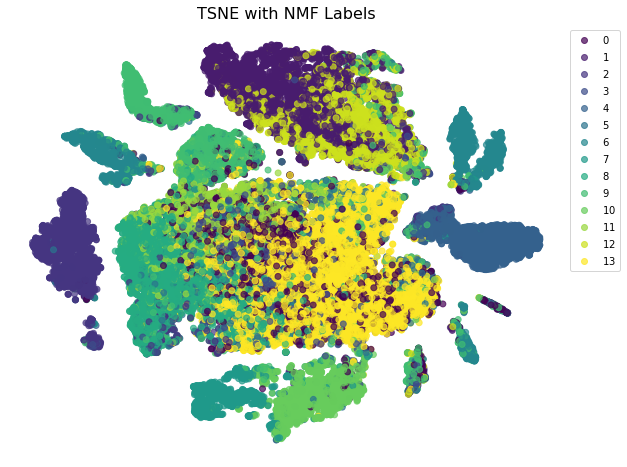

In [34]:
# tsne visualization
tsne_df['nmf_label'] = nmf_labels_norm

fig, ax = plt.subplots(figsize = (10,8))
scatter = ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.nmf_label, alpha = 0.7)
plt.title('TSNE with NMF Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

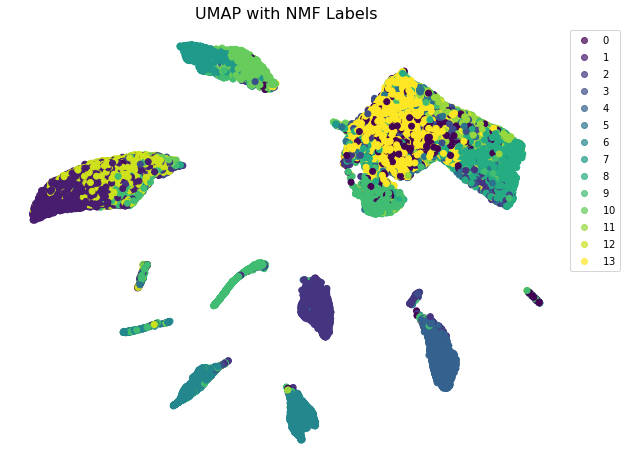

In [35]:
# umap visualization
umap_df['nmf_label'] = nmf_labels_norm

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.nmf_label)
plt.title('UMAP with NMF Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

# Task Based Evaluation of Unsupervised Models
Evaluate the performance improvement of supervised models with the inclusion of unsupervised model generated labels.  If a notable performace is observed, the unsupervised model is adding an additional signal the supervised model can capitalize on.

In [36]:
# Load new classifier dependencies
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Load function from Supervised Learning code
def generate_class_dataframe(model, model_name, input_name, X_test, y_test):
    class_report = classification_report(y_test['type'], model.predict(X_test), zero_division = 0, output_dict = True)
    df = pd.DataFrame.from_dict({key: class_report[key] for key in class_report if key not in ["support", "accuracy", "macro avg", "weighted avg"]}, orient='index')
    midx = pd.MultiIndex.from_arrays([[model_name]*len(df.columns), [input_name]*len(df.columns), df.columns])
    df.columns = midx
    return df

In [38]:
# add labels to PCA data and compare classifier results
# start with kmeans - the best performing model
K_X_train = PCA_X_train.copy(deep=True)
K_X_train['k_label'] = kmeans.labels_

K_X_test = PCA_X_test.copy(deep=True)
kmeans_test = KMeans(n_clusters=14, random_state=42).fit(K_X_test)
K_X_test['k_label'] = kmeans_test.labels_

# agglomerative
A_X_train = PCA_X_train.copy(deep=True)
A_X_train['a_label'] = agglo_labels

A_X_test = PCA_X_test.copy(deep=True)
agglo_modeltest = ward(A_X_test)
agglo_labels_test  = fcluster(agglo_modeltest, k, criterion='maxclust')
A_X_test['a_label'] = agglo_labels_test

# Non-negative matrix factorization (normalized)
N_X_train = PCA_X_train.copy(deep=True)
N_X_train['n_label'] = nmf_labels_norm

N_X_test_df = pd.read_csv(X_test_csv)
N_X_test_df.set_index('CellID', inplace = True)
norm_X_test = np.log(1+N_X_test_df) 
norm_nmf_test_model = NMF(n_components=14, init='nndsvd', max_iter = 2000, random_state=42)
Wnorm_test = norm_nmf_test_model.fit_transform(norm_X_test)
nmf_labels_test = np.argmax(Wnorm_test, axis=1)
N_X_test = PCA_X_test.copy(deep=True)
N_X_test['n_label'] = nmf_labels_test


In [39]:
N_X_test

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,n_label
CellID,,,,,,,,,,,
GTCTCGTCAGTCCTTC_14,-2.037433,2.746242,0.904195,0.366391,2.004628,2.475428,-3.721141,-0.918703,-1.157729,0.397420,9
TTGAGGTGATCACG_11,-5.718739,2.589287,2.948822,-0.415989,-0.609318,1.565274,-0.447875,0.527303,-0.725809,-0.029950,3
TGCCAGCTGGATCT_1,4.913210,5.403677,-2.641886,-1.258019,1.248361,-4.014375,4.714425,1.560420,4.072047,1.814306,2
TGAGAGGCATGTCGAT_17,-0.824993,-11.159815,-8.596252,-0.182168,-0.238391,-0.507547,0.622481,2.515553,0.479041,-0.054912,1
TCTCATAAGTTTAGGA_24,-3.665250,0.783793,1.634800,0.206971,-0.396663,0.356318,-0.069695,0.274813,0.968395,0.001383,0
...,...,...,...,...,...,...,...,...,...,...,...
CTCCTAGCATTAACCG_19,-1.045147,1.494018,0.439389,-1.588340,-0.013447,-0.133147,3.693608,-9.446901,-1.161576,-2.048038,7
TCTATTGTCATGCAAC_20,-4.516727,2.667617,2.995469,-0.732676,0.732310,0.008344,0.326183,2.961890,-0.265253,0.016768,13
GCTTCCATCAAGGTAA_21,2.807780,-10.360260,-8.935171,-1.547579,-1.192702,0.951866,1.710555,1.157379,0.482206,-0.641305,1


In [40]:
random_forest_dataframes = []
random_forest = RandomForestClassifier(random_state=RANDOM_SEED).fit(PCA_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest, "Random Forest", "Control", PCA_X_test, y_test))

random_forest_k = RandomForestClassifier(random_state=RANDOM_SEED).fit(K_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest_k, "Random Forest", "K_mean", K_X_test, y_test))

random_forest_a = RandomForestClassifier(random_state=RANDOM_SEED).fit(A_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest_a, "Random Forest", "Agglomerative", A_X_test, y_test))

random_forest_n = RandomForestClassifier(random_state=RANDOM_SEED).fit(N_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest_n, "Random Forest", "NMF", N_X_test, y_test))


In [41]:
rf = pd.concat(random_forest_dataframes, axis =1)
rf.round(3)

Random Forest                                                    \
                  Control                            K_mean                   
                precision recall f1-score support precision recall f1-score   
Alveolar            0.989  0.978    0.984      92     0.989  0.978    0.984   
B cell              0.967  0.952    0.959     855     0.924  0.951    0.937   
CD4 T               0.867  0.879    0.873    2119     0.847  0.868    0.858   
CD8 T               0.841  0.930    0.883    2503     0.839  0.911    0.874   
DC                  0.800  0.119    0.207     101     0.923  0.119    0.211   
Endothelial         0.994  0.984    0.989     317     0.997  0.984    0.990   
Epithelial          1.000  0.977    0.988      43     1.000  0.977    0.988   
Mast                0.991  0.966    0.978     117     0.452  0.564    0.502   
Myeloid             0.937  0.995    0.965    1810     0.939  0.992    0.965   
NK                  0.564  0.176    0.268     176     0.455  0.057    0.101   
RBC                 0.000  0.000    0.000     187     0.333  0.005    0.011   
Stromal             0.980  0.967    0.974     306     0.980  0.980    0.980   
Tumor               0.973  0.988    0.980    1441     0.971  0.988    0.979   
pDC                 0.800  0.400    0.533      20     0.500  0.150    0.231   

                                                                            \
                    Agglomerative                               NMF          
            support     precision recall f1-score support precision recall   
Alveolar         92         0.989  0.978    0.984      92     0.989  0.978   
B cell          855         0.733  0.950    0.827     855     0.971  0.951   
CD4 T          2119         0.804  0.904    0.851    2119     0.879  0.843   
CD8 T          2503         0.891  0.817    0.852    2503     0.811  0.946   
DC              101         0.909  0.099    0.179     101     0.846  0.109   
Endothelial     317         0.997  0.953    0.974     317     0.997  0.987   
Epithelial       43         1.000  0.953    0.976      43     1.000  0.977   
Mast            117         0.991  0.991    0.991     117     0.991  0.974   
Myeloid        1810         0.934  0.998    0.965    1810     0.936  0.997   
NK              176         0.581  0.142    0.228     176     0.385  0.028   
RBC             187         0.000  0.000    0.000     187     0.000  0.000   
Stromal         306         0.980  0.967    0.974     306     0.983  0.971   
Tumor          1441         0.975  0.988    0.981    1441     0.971  0.989   
pDC              20         0.000  0.000    0.000      20     0.889  0.400   

                              
                              
            f1-score support  
Alveolar       0.984      92  
B cell         0.961     855  
CD4 T          0.861    2119  
CD8 T          0.873    2503  
DC             0.193     101  
Endothelial    0.992     317  
Epithelial     0.988      43  
Mast           0.983     117  
Myeloid        0.965    1810  
NK             0.053     176  
RBC            0.000     187  
Stromal        0.977     306  
Tumor          0.980    1441  
pDC            0.552      20

In [42]:
# see mean
rf.mean()

Random Forest  Control        precision      0.835854
                              recall         0.736512
                              f1-score       0.755873
                              support      720.500000
               K_mean         precision      0.796402
                              recall         0.680310
                              f1-score       0.686422
                              support      720.500000
               Agglomerative  precision      0.770327
                              recall         0.695720
                              f1-score       0.698765
                              support      720.500000
               NMF            precision      0.831978
                              recall         0.725064
                              f1-score       0.740097
                              support      720.500000
dtype: float64

In [43]:
gbdt_dataframes = []
gbdt = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(PCA_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt, "Gradient-boosted Decision Tree", "Control", PCA_X_test, y_test))

gbdt_k = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(K_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt_k, "Gradient-boosted Decision Tree", "Kmeans", K_X_test, y_test))

gbdt_a = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(A_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt_a, "Gradient-boosted Decision Tree", "Agglomerative", A_X_test, y_test))

gbdt_n = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(N_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt_n, "Gradient-boosted Decision Tree", "NMF", N_X_test, y_test))


In [44]:
gb = pd.concat(gbdt_dataframes, axis =1)
gb.round(3)

Gradient-boosted Decision Tree                                    \
                                   Control                            Kmeans   
                                 precision recall f1-score support precision   
Alveolar                             0.967  0.957    0.962      92     0.989   
B cell                               0.964  0.920    0.942     855     0.970   
CD4 T                                0.850  0.874    0.862    2119     0.849   
CD8 T                                0.848  0.908    0.877    2503     0.851   
DC                                   0.565  0.129    0.210     101     0.591   
Endothelial                          0.984  0.984    0.984     317     0.981   
Epithelial                           1.000  0.953    0.976      43     1.000   
Mast                                 0.990  0.846    0.912     117     0.991   
Myeloid                              0.936  0.991    0.963    1810     0.936   
NK                                   0.480  0.267    0.343     176     0.654   
RBC                                  0.056  0.005    0.010     187     0.111   
Stromal                              0.980  0.961    0.970     306     0.867   
Tumor                                0.970  0.982    0.976    1441     0.964   
pDC                                  0.170  0.400    0.239      20     0.265   

                                                                           \
                                    Agglomerative                           
            recall f1-score support     precision recall f1-score support   
Alveolar     0.967    0.978      92         0.909  0.326    0.480      92   
B cell       0.920    0.945     855         0.813  0.959    0.880     855   
CD4 T        0.898    0.873    2119         0.872  0.795    0.832    2119   
CD8 T        0.913    0.881    2503         0.827  0.922    0.872    2503   
DC           0.129    0.211     101         0.543  0.188    0.279     101   
Endothelial  0.984    0.983     317         0.984  0.972    0.978     317   
Epithelial   0.953    0.976      43         1.000  0.953    0.976      43   
Mast         0.966    0.978     117         0.991  0.983    0.987     117   
Myeloid      0.992    0.963    1810         0.938  0.989    0.963    1810   
NK           0.097    0.168     176         0.490  0.273    0.350     176   
RBC          0.011    0.020     187         0.182  0.021    0.038     187   
Stromal      0.958    0.910     306         0.902  0.961    0.930     306   
Tumor        0.958    0.961    1441         0.963  0.971    0.967    1441   
pDC          0.450    0.333      20         0.000  0.000    0.000      20   

                                               
                  NMF                          
            precision recall f1-score support  
Alveolar        0.967  0.957    0.962      92  
B cell          0.962  0.919    0.940     855  
CD4 T           0.864  0.831    0.847    2119  
CD8 T           0.812  0.928    0.867    2503  
DC              0.600  0.149    0.238     101  
Endothelial     0.978  0.987    0.983     317  
Epithelial      1.000  0.953    0.976      43  
Mast            0.990  0.855    0.917     117  
Myeloid         0.937  0.991    0.963    1810  
NK              0.300  0.051    0.087     176  
RBC             0.129  0.021    0.037     187  
Stromal         0.973  0.954    0.964     306  
Tumor           0.962  0.978    0.970    1441  
pDC             0.173  0.450    0.250      20

In [45]:
# Random Forest Feature importance
print("Feature Importance of control: ", random_forest.feature_importances_)
print("Feature Importance of kmeans: ", random_forest_k.feature_importances_)
print("Feature Importance of agglomerative: ", random_forest_a.feature_importances_)
print("Feature Importance of NMF: ", random_forest_n.feature_importances_)

Feature Importance of control:  [0.14915693 0.16506496 0.13985729 0.05196842 0.0572827  0.05006132
 0.13217323 0.10673576 0.04916928 0.09853011]
Feature Importance of kmeans:  [0.1078762  0.14670724 0.1077865  0.0466286  0.04623976 0.04219648
 0.08681997 0.08652776 0.04087126 0.06794618 0.22040006]
Feature Importance of agglomerative:  [0.08186657 0.12046249 0.11064807 0.04639329 0.04181031 0.0400509
 0.09036172 0.09336738 0.0479492  0.09950348 0.22758659]
Feature Importance of NMF:  [0.13079016 0.17215894 0.13665705 0.04872304 0.05117627 0.04669207
 0.11306404 0.09986482 0.04745342 0.09292494 0.06049526]


In [46]:
# Gradient Boosted Decision Tree Feature importance
print("Feature Importance of control: ", gbdt.feature_importances_)
print("Feature Importance of kmeans: ", gbdt_k.feature_importances_)
print("Feature Importance of agglomerative: ", gbdt_a.feature_importances_)
print("Feature Importance of NMF: ", gbdt_n.feature_importances_)

Feature Importance of control:  [0.23422926 0.30408307 0.0723198  0.05888964 0.03480622 0.01209507
 0.14624191 0.03705507 0.0177628  0.08251715]
Feature Importance of kmeans:  [0.03621719 0.2979157  0.05898889 0.05734467 0.03326472 0.01015478
 0.10304371 0.02535819 0.01156362 0.03623648 0.32991205]
Feature Importance of agglomerative:  [0.12750524 0.1743284  0.07142407 0.05561567 0.0039768  0.00752904
 0.04930817 0.03487672 0.02411225 0.07124252 0.38008112]
Feature Importance of NMF:  [0.17666152 0.29747518 0.06260889 0.05808591 0.03411386 0.01015639
 0.14048853 0.03539775 0.01589703 0.05280913 0.11630579]


In [47]:
gb.mean()

Gradient-boosted Decision Tree  Control        precision      0.768567
                                               recall         0.726992
                                               f1-score       0.730395
                                               support      720.500000
                                Kmeans         precision      0.787103
                                               recall         0.728243
                                               f1-score       0.727167
                                               support      720.500000
                                Agglomerative  precision      0.743853
                                               recall         0.665261
                                               f1-score       0.680948
                                               support      720.500000
                                NMF            precision      0.760606
                                               recall         0.716133
      

In [48]:
rf.mean()

Random Forest  Control        precision      0.835854
                              recall         0.736512
                              f1-score       0.755873
                              support      720.500000
               K_mean         precision      0.796402
                              recall         0.680310
                              f1-score       0.686422
                              support      720.500000
               Agglomerative  precision      0.770327
                              recall         0.695720
                              f1-score       0.698765
                              support      720.500000
               NMF            precision      0.831978
                              recall         0.725064
                              f1-score       0.740097
                              support      720.500000
dtype: float64

## Finding the best model to create a feature for a better supervised model
The clustering so far has been to describe, explore, and understand gene expression in different types of cells. We have used the knowledge that we know the number of cell types and have created cell clusters in hope that those clusters are the different cell types.  However, it seems the adding the cluster data is not improving results - perhaps because the supervised and unsupervised are learning overlapping relationships.  To this end, we will now try K-means clustering algorithm, but varying the number of clusters in hope the unsupervised model learns something different that can be exploited downstream.

In [49]:
# run random forest algorithm for cluster odd cluster numbers from 3 to 21

rf_cluster_diff_dataframes = []
random_forest = RandomForestClassifier(random_state=RANDOM_SEED).fit(PCA_X_train, y_train['type'])
rf_cluster_diff_dataframes.append(generate_class_dataframe(random_forest, "Random Forest", "Control", PCA_X_test, y_test))

In [50]:
num_clusters = [3,5,7,9,11,13,15,17,19,21, 23]
feat_importance = []

for clust in num_clusters:
    K_X_train = PCA_X_train.copy(deep=True)
    kmeans_train = KMeans(n_clusters=clust, random_state=42).fit(K_X_train)
    K_X_train['k_label'] = kmeans_train.labels_

    K_X_test = PCA_X_test.copy(deep=True)
    kmeans_test = KMeans(n_clusters=clust, random_state=42).fit(K_X_test)
    K_X_test['k_label'] = kmeans_test.labels_

    random_forest_k = RandomForestClassifier(random_state=RANDOM_SEED).fit(K_X_train, y_train['type'])
    rf_cluster_diff_dataframes.append(generate_class_dataframe(random_forest_k, "Random Forest", clust, K_X_test, y_test))

    feat_importance.append(random_forest_k.feature_importances_)

In [51]:
feat_importance

[array([0.12129769, 0.12656964, 0.119124  , 0.04979424, 0.05283641,
        0.04257433, 0.12098231, 0.10788814, 0.04548486, 0.10302967,
        0.11041872]),
 array([0.10362029, 0.12794332, 0.12225781, 0.04803159, 0.04208036,
        0.04065644, 0.11392125, 0.11556548, 0.05252961, 0.09549244,
        0.13790142]),
 array([0.11679549, 0.1458954 , 0.13120311, 0.047563  , 0.04720599,
        0.04436439, 0.12509626, 0.1035001 , 0.05529003, 0.09817845,
        0.08490778]),
 array([0.09895259, 0.13163347, 0.10577837, 0.0449703 , 0.04233211,
        0.04131903, 0.11965904, 0.10688977, 0.05170472, 0.09753236,
        0.15922825]),
 array([0.09735683, 0.13725663, 0.10846212, 0.04597163, 0.04033878,
        0.0397325 , 0.10366398, 0.09416338, 0.04469126, 0.0922815 ,
        0.19608139]),
 array([0.11035795, 0.14687605, 0.11253534, 0.04836132, 0.04658861,
        0.04189544, 0.08474799, 0.08894749, 0.03921006, 0.06495399,
        0.21552578]),
 array([0.12437467, 0.16303923, 0.1248518 , 0.047065

In [52]:
all_clusters = pd.concat(rf_cluster_diff_dataframes,axis =1)

In [53]:
summerize_all_clusters = all_clusters.mean()[[2,6,10,14,18,22,26,30,34,38,42,46]]

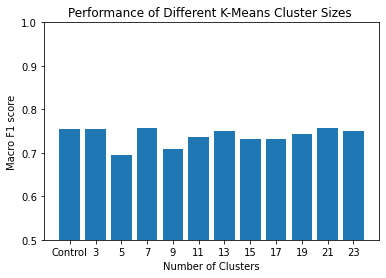

In [54]:
x = ['Control', '3', '5', '7', '9', '11', '13','15', '17', '19', '21', '23']
macrof1 = summerize_all_clusters.values

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, macrof1)
plt.xlabel("Number of Clusters")
plt.ylabel("Macro F1 score")
plt.title("Performance of Different K-Means Cluster Sizes ")

plt.xticks(x_pos, x)
plt.ylim(0.5, 1.0)
plt.show()